# Task 1 TSF

# Data Science and Business Analytics Tasks

## Predict the percentage of an student based on the no. of study hours 

## Author: Prasad Patil

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Importing dataset 

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.shape # tells no. of rows and coloums in dataset

(25, 2)

#### Now Let's plot our data points on a graph to know the relationship between the data

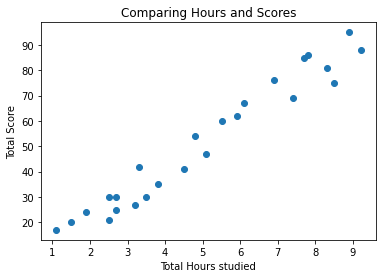

In [7]:
plt.scatter(df['Hours'],df['Scores'])
plt.title('Comparing Hours and Scores')
plt.xlabel('Total Hours studied')
plt.ylabel('Total Score')
plt.show()

#### So from the above graph we can draw one conclusion that there is a positive line relation between total hours studied and total score

# Preparing the data
### Now next step is to seperate the input (attributes) and output (labels) values from the data

In [15]:
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values
#print(X,y)

#### So now we have our attributes and labels, the next step is to split the data into training amnd testing sets. 
### We will do this with train_test_split() method available in Scikit-learn 

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


# Training Algorithm

#### So after spliting the data into training and testing sets, now we have to train our model to get the desired results

In [17]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
print("Training completed for the model")



Training completed for the model


### Now we need to plot the best fit line for the model

### But before that we need to find the coefficient and intercept for regression line

In [21]:
print("Coefficient",model.coef_)
print("Intercept",model.intercept_)

Coefficient [9.91065648]
Intercept 2.018160041434683


## Plotting the regression line

In [2]:
line=model.coef_*X+model.intercept_

## Now Plotting the Best Fit Line for the Model

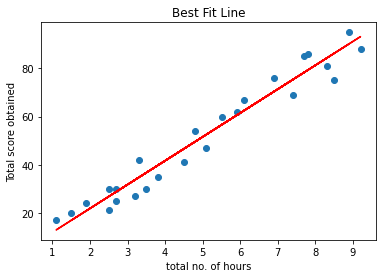

In [25]:
plt.scatter(df['Hours'],df['Scores'])
plt.plot(X,line,c='r')
plt.title('Best Fit Line')
plt.xlabel('total no. of hours')
plt.ylabel('Total score obtained')
plt.show()

# Making Predictions of the model (Testing the Model)

### So after training the model, it's time to make some predictions 

In [30]:
print(X_test) #Testing in hours
y_pred=model.predict(X_test)
print(y_pred)# Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


##### You can also check with a specific value



In [33]:
model.predict([[4.5]])

array([46.6161142])

#### you can also cross check if the value is correct by comparing it with linear regression equation

coefficient*model.predict[value]+intercept

#### It should be same as model.predict value

In [35]:
# Example

9.91065648*4.5+2.018160041434683

46.616114201434684

### As seen above the linear regression equation matches with model predict value so it is correct

#### Now Again just compare Actual vs Predicted value

In [38]:
df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Now we will just take a proper example to show testing with our own data



In [58]:
hours=[[9.25]]
own_predict=model.predict(hours)
print("No. of Hours= {}".format(hours))
print("Predicted Score= {}".format(own_predict[0]))


No. of Hours= [[9.25]]
Predicted Score= 93.69173248737538


#### Now we will take input form the user itself to test the model

In [62]:
val=input('Enter no. of hours studied')
reshape=np.array(val).reshape(-1,1)
score=model.predict(reshape)
print("Predicted score={}".format(score[0]))

Enter no. of hours studied9.25
Predicted score=93.69173248737538


C:\Users\patil\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


# Evaluating the model

#### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. We will use coefficient of determination i.e r2 score 

Coefficient of Determination = R2 Score
0 to 1 (0 - Bad and 1 - Good)
-1 ( Means your model creation is wrong )

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)  # Accuracy score

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)  # Accuracy score

0.9454906892105356

#### We will also use we the mean square error metrics for evaluating the model\


In [50]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
